In [1]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


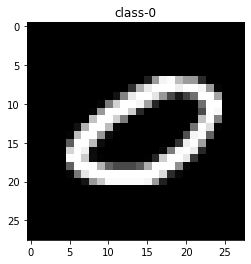

Train image 12553-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31 154 244
  251 187 154 152  43   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [85]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/sysadm/Documents/sem_2_Biswajit_rana/RKMVERI_2ND/class/ML/SS_assignments_1/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
rand_ids=12553
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



In [77]:
train_images=train_images.reshape(60000,28*28)
train_images.shape

(60000, 784)

# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [78]:
# Your validation set extraction script/code 
def simple_split(X, y, test_size):
  num_samples = len(X)
  val_size = int(test_size * num_samples)
  indices = np.random.permutation(num_samples)
  indices_val = indices[:val_size]
  indices_train = indices[val_size:]
  X_train = X[indices_train]
  X_val = X[indices_val]
  y_train = y[indices_train]
  y_val = y[indices_val]
  return X_train, X_val, y_train, y_val

# Usage:
X_train, X_val, y_train, y_val = simple_split(train_images, train_labels, 0.2)


In [79]:
print(X_train.shape)#img
print(y_train.shape)#lab
print(X_val.shape)#img
print(y_val.shape)#lab

(48000, 784)
(48000,)
(12000, 784)
(12000,)


In [63]:
# print(np.bincount(y_val))
# print(y_val[:1000])

12553
1


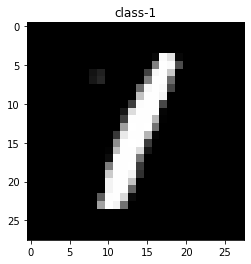

2798
2


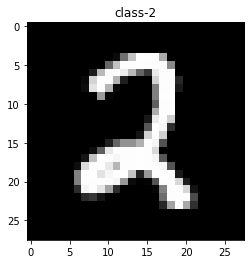

In [84]:
#peek

rand_ids = np.random.choice(X_train.shape[0])
print(rand_ids)
print(y_train[rand_ids])
plt.imshow(X_train[rand_ids, :].reshape(28,28), cmap='gray')
plt.title('class-'+str(y_train[rand_ids]))
plt.show()

rand_ids = np.random.choice(X_val.shape[0])
print(rand_ids)
print(y_val[rand_ids])
plt.imshow(X_val[rand_ids, :].reshape(28,28), cmap='gray')
plt.title('class-'+str(y_val[rand_ids]))
plt.show()

# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [49]:
# Your k-NN algorithm script/code 


In [86]:
import numpy as np
from math import sqrt

def euclidean_distance(x1, x2):
    """Calculates the Euclidean distance between two data points."""
    return sqrt(np.sum((x1 - x2)**2))

def knn_predict(X_train, y_train, X_test, k):
    """Predicts class labels for test data using KNN without scikit-learn."""

    predictions = []
    for x in X_test:
        distances = np.array([euclidean_distance(x, t) for t in X_train])
        nearest_neighbors = np.argsort(distances)[:k]
        neighbor_labels = y_train[nearest_neighbors]
        prediction = np.argmax(np.bincount(neighbor_labels))
        predictions.append(prediction)
    return predictions


def calculate_accuracy(y_true, y_pred):
    """Calculates accuracy metrics."""
    correct = np.sum(y_true == y_pred)
    accuracy = correct / len(y_true)
    precision = correct / np.sum(y_pred == y_true)  # For label 1 prediction
    return accuracy, precision



In [89]:
# Load and normalize MNIST data (e.g., using TensorFlow or custom loading)

# Assuming X_train is (48000, 28, 28) and y_train is (48000,)

# Normalize data (consider standardization or min-max scaling)
# X_train = ... (normalize your training data)
# X_test = ... (normalize your test data)

# Stratified split without scikit-learn
X_train, X_val, y_train, y_val = X_train, X_val, y_train, y_val

# Find the best k value through grid search
best_k = None
best_accuracy = 0
best_precision = 0
k_values = range(1, 27)  # Include k=25
# k_values=[3,5]
for k in k_values:
    y_pred_val = knn_predict(X_train, y_train, X_val, k)
    accuracy, precision = calculate_accuracy(y_val, y_pred_val)
    print(f"k={k}, Accuracy: {accuracy:.4f}, Precision (label 1): {precision:.4f}")
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_precision = precision

print(f"Best k: {best_k}, Best Accuracy: {best_accuracy:.4f}, Best Precision (label 1): {best_precision:.4f}")

# Final evaluation on test data using the best k
# y_pred_test = knn_predict(X_train, y_train, X_test, best_k)
# test_accuracy, test_precision = calculate_accuracy(y_test, y_pred_test)
